<a href="https://colab.research.google.com/github/ermeenu/Google-Capstone-Project/blob/main/Cyclist_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[**Google Data Analytics Capstone Project**](https://www.coursera.org/professional-certificates/google-data-analytics)

### **A Detail-Oriented Analysis of Cyclistic: A Chicago Bike-Sharing Company**

## **Introduction**
Cyclistic is a Chicago-based bike-sharing program that provides over 5,800 bicycles, with 692 docking stations across the city. The program caters to diverse rider needs, including traditional bikes, hand tricycles, and cargo bikes, ensuring inclusivity. Cyclistic offers three pricing plans: single-ride passes, full-day passes, and annual memberships. While the program has grown significantly, Cyclistic’s financial analysts report that annual members are more profitable than casual riders.

To support Cyclistic’s goal of increasing annual memberships, I have been tasked with analyzing how casual riders and annual members use Cyclistic bikes differently. This report outlines my findings and recommendations to convert casual riders into annual members, backed by data insights and visualizations.

## **Objective**
The objective of this analysis is to address the following question:
How do annual members and casual riders use Cyclistic bikes differently?
The findings from this analysis will guide marketing strategies aimed at converting casual riders into annual members.

Key stakeholders include :
*   Cyclistic’s marketing analytics team
*   The director of marketing
*   The executive team

## **1. Ask**
The first phase of this project is defining the business problem and identifying key objectives.

Business Task
Cyclistic seeks to understand the differences in bike usage between annual members and casual riders. The insights will guide the development of marketing strategies to convert casual riders into annual members. Specifically, this analysis addresses the following question:

How do annual members and casual riders use Cyclistic bikes differently?

### **2. Prepare**
### Data Source
The data used for this analysis is [Cyclistic’s Historical Trip Data](https://divvy-tripdata.s3.amazonaws.com/index.html), covering 12 months from January 1, 2023, to December 30, 2023. It is organized into 12 monthly CSV files, making it easy to handle.

Although Cyclistic is a fictional company, the data comes from a real bike-sharing company in Chicago. It was provided by [Motivate International Inc.](https://divvybikes.com/data-license-agreement) and follows licensing rules. The data is reliable, original, current, and well-cited (ROCCC), but it is not complete, as some details are missing.

The data is accurate, consistent, and trustworthy. However, there are some limitations:

**Privacy**: The data does not include personal details, so I cannot check if casual riders live in the service area or buy multiple single passes.

**Financial Details** :  There is no information about ticket prices, which makes it hard to calculate if casual riders spend more than the cost of an annual membership.

## **3. Process**

#  Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
import datetime as dt
import os
import zipfile
import plotly.graph_objects as go
import pandas as pd

from plotly.subplots import make_subplots


In [2]:
!pip install mplcursors

# ===============================
# 1. DATA LOADING AND PREPROCESSING
# ===============================

In [3]:
csv_folder_path = '/content/drive/MyDrive/Cyclistic2023'

In [4]:
# List all files in the directory
all_files = os.listdir(csv_folder_path)

# Filter out only CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

print("Found {} CSV files.".format(len(csv_files)))
print("Files:")
for file in csv_files:
    print(file)

Found 12 CSV files.
Files:
202301-divvy-tripdata.csv
202302-divvy-tripdata.csv
202303-divvy-tripdata.csv
202304-divvy-tripdata.csv
202305-divvy-tripdata.csv
202306-divvy-tripdata.csv
202307-divvy-tripdata.csv
202308-divvy-tripdata.csv
202309-divvy-tripdata.csv
202310-divvy-tripdata.csv
202311-divvy-tripdata.csv
202312-divvy-tripdata.csv


In [5]:
# Create an empty list to hold individual DataFrames
df_list = []

# Loop through the list of CSV files and read each into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into one
df = pd.concat(df_list, ignore_index=True)

print('Data combined successfully! Total records:', len(df))

Data combined successfully! Total records: 5719877


In [6]:
# Initial exploration of data
print("Initial Dataset Overview:")
print(df.info())


Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 567.3+ MB
None


In [7]:
print("\nSample Data:")
df.head()


Sample Data:


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


# ===============================
# 2. DATA CLEANING
# ===============================

 Handle Missing Values and Duplicates

In [8]:
df['ride_id'].duplicated().sum()

0

In [9]:
df.drop_duplicates(subset=['ride_id'], keep='first', inplace=True)
df['ride_id'].duplicated().sum()

0

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64


In [11]:
df.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,875716
start_station_id,875848
end_station_name,929202
end_station_id,929343
start_lat,0
start_lng,0


In [12]:
# Calculating the percentage of null values
print('The percentage of missing values is:',round((df.isna().sum().max() * 100)/df.shape[0],2),'%')

The percentage of missing values is: 16.25 %


The dataset has missing values in columns like start_station_name (16.25%) and end_station_name, but I am keeping these rows to preserve the data. Removing them would affect ride counts and trends. The missing values will remain as they are, as other data in the rows is still useful. This ensures no rides are excluded, keeping the analysis accurate.

In [13]:
# Convert 'started_at' and 'ended_at' to datetime format
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

In [14]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [15]:
# Check for NaT values
print("Invalid 'started_at' entries:", df['started_at'].isna().sum())
print("Invalid 'ended_at' entries:", df['ended_at'].isna().sum())

Invalid 'started_at' entries: 0
Invalid 'ended_at' entries: 0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.3+ MB


In [17]:
# Remove rows where ride duration is invalid (e.g., negative duration)
df['ride_length_min'] = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round(2)
df = df[df['ride_length_min'] > 0]

In [18]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,10.85
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.48
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,13.23
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,8.77
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,15.32


# ===============================
# 3. FEATURE ENGINEERING
# ===============================

Adding New Columns

In [19]:
# Add new time-based features
df['day_of_week'] = df['started_at'].dt.day_name()  # Day of the week
df['hour'] = df['started_at'].dt.hour              # Hour of the day
df['month_num'] = df['started_at'].dt.month            # Month
df['month'] = df['month_num'].map({
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Map months to seasons
df['season'] = df['month_num'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# Define time of day categories based on the hour
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the time of day function
df['time_of_day'] = df['hour'].apply(get_time_of_day)




In [20]:
# Preview the new columns
df[['started_at','ride_length_min', 'hour', 'month','time_of_day', 'day_of_week', 'season']].head()

,started_at,ride_length_min,hour,month,time_of_day,day_of_week,season
0,2023-01-21 20:05:42,10.85,20,January,Evening,Saturday,Winter
1,2023-01-10 15:37:36,8.48,15,January,Afternoon,Tuesday,Winter
2,2023-01-02 07:51:57,13.23,7,January,Morning,Monday,Winter
3,2023-01-22 10:52:58,8.77,10,January,Morning,Sunday,Winter
4,2023-01-12 13:58:01,15.32,13,January,Afternoon,Thursday,Winter


# ===============================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ===============================

In [21]:
# Basic descriptive statistics
print("\nDescriptive Statistics:")
df.describe().round(2)


Descriptive Statistics:


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_length_min,hour,month_num
count,5718608,5718608,5718608.00,5718608.00,5711618.00,5711618.00,5718608.00,5718608.00,5718608.00
mean,2023-07-16 10:15:57.984797440,2023-07-16 10:34:09.324541696,41.90,-87.65,41.90,-87.65,18.19,14.09,6.99
min,2023-01-01 00:01:58,2023-01-01 00:02:41,41.63,-87.94,0.00,-88.16,0.02,0.00,1.00
25%,2023-05-21 12:45:26,2023-05-21 13:08:05,41.88,-87.66,41.88,-87.66,5.42,11.00,5.00
50%,2023-07-20 17:57:20,2023-07-20 18:13:58,41.90,-87.64,41.90,-87.64,9.53,15.00,7.00
75%,2023-09-16 20:02:36.500000,2023-09-16 20:22:21.500000,41.93,-87.63,41.93,-87.63,16.92,18.00,9.00
max,2023-12-31 23:59:38,2024-01-01 23:50:51,42.07,-87.46,42.18,0.00,98489.07,23.00,12.00
std,NaN,NaN,0.05,0.03,0.05,0.07,180.23,4.94,2.72


In [22]:
df.sort_values(by='ride_length_min',ascending=True)
print('The percentage is:',df.query('ride_length_min <1').shape[0] / df.shape[0] * 100)

The percentage is: 2.594092828184761


In [23]:
df.sort_values(by='ride_length_min',ascending=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length_min,day_of_week,hour,month_num,month,season,time_of_day
5366420,0C38C5A1FF935CCB,electric_bike,2023-11-07 12:09:19,2023-11-07 12:09:20,NaN,NaN,NaN,NaN,42.050000,-87.680000,42.050000,-87.680000,member,0.02,Tuesday,12,11,November,Autumn,Afternoon
3050231,7944EEFD863EB5AF,electric_bike,2023-07-08 19:20:39,2023-07-08 19:20:40,Michigan Ave & Oak St,13042,NaN,NaN,41.901157,-87.623615,41.900000,-87.620000,casual,0.02,Saturday,19,7,July,Summer,Evening
4415516,36B663CC537E1147,electric_bike,2023-09-05 19:56:03,2023-09-05 19:56:04,NaN,NaN,NaN,NaN,41.930000,-87.640000,41.930000,-87.640000,member,0.02,Tuesday,19,9,September,Autumn,Evening
2370970,2A9B48787CF62456,electric_bike,2023-06-30 16:03:49,2023-06-30 16:03:50,NaN,NaN,NaN,NaN,41.880000,-87.650000,41.880000,-87.650000,member,0.02,Friday,16,6,June,Summer,Afternoon
2547762,B2CC21544A368AE3,electric_bike,2023-07-13 07:49:24,2023-07-13 07:49:25,Campbell Ave & Augusta Blvd,410,Campbell Ave & Augusta Blvd,410,41.899413,-87.689357,41.899578,-87.689497,member,0.02,Thursday,7,7,July,Summer,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863256,1A572575C18B600B,docked_bike,2023-08-15 15:19:32,2023-09-29 04:51:14,Shedd Aquarium,15544,NaN,NaN,41.867226,-87.615355,NaN,NaN,casual,64171.70,Tuesday,15,8,August,Summer,Afternoon
3829955,ED31EE7C8024D292,docked_bike,2023-08-11 18:58:28,2023-10-06 04:33:29,Buckingham Fountain (Michigan/11th),15541,NaN,NaN,41.876423,-87.620339,NaN,NaN,casual,79775.02,Friday,18,8,August,Summer,Evening
3288083,9EC4ACDAA96E516F,docked_bike,2023-08-07 12:16:36,2023-10-04 09:59:11,State St & Van Buren St,TA1305000035,NaN,NaN,41.877181,-87.627844,NaN,NaN,casual,83382.58,Monday,12,8,August,Summer,Afternoon
3188701,24154619AEE96E2C,docked_bike,2023-08-03 22:06:08,2023-10-07 04:56:03,Broadway & Argyle St,13108,NaN,NaN,41.973815,-87.659660,NaN,NaN,casual,92569.92,Thursday,22,8,August,Summer,Night


checks for short rides less than 1 minute, which are likely not meaningful and could be errors or anomalies.

In [24]:
zero_length = (df['ride_length_min'] < 1)
zero_length_index = df.loc[zero_length].index.to_list()
df = df.drop(axis=0,index=zero_length_index, inplace=False)

It identifies that these short rides make up 2.59% of the dataset. Since such rides may distort the analysis, they are removed to improve the quality of the data

In [25]:
df.sort_values(by='ride_length_min',ascending=True)
print('The percentage is:',df.query('ride_length_min < 1').shape[0] / df.shape[0] * 100)

The percentage is: 0.0


### ***Count of users by type***

In [26]:
# Count of users by type
print("\nNumber of Rides by User Type:")
df['member_casual'].value_counts()


Number of Rides by User Type:


,count
member_casual,
member,3564512
casual,2005750


### ***Count of rideable types***

In [27]:
# Count of rideable types
df['rideable_type'].value_counts()

,count
rideable_type,
electric_bike,2837948
classic_bike,2654740
docked_bike,77574


### ***Max ride length by user group***

In [28]:
# Grouping by type of user
user_grp = df.groupby('member_casual')
# Grouping by type of rideable
rideable_grp = df.groupby('rideable_type')

In [29]:
# Max ride length by user grp
print('max ride length by user group:')
print()
print(user_grp['ride_length_min'].max())

print()
print('max ride length by rideable type:')
print(rideable_grp['ride_length_min'].max())

max ride length by user group:

member_casual
casual    98489.07
member     1559.67
Name: ride_length_min, dtype: float64

max ride length by rideable type:
rideable_type
classic_bike      1559.93
docked_bike      98489.07
electric_bike      481.50
Name: ride_length_min, dtype: float64


In [30]:
df.groupby(['member_casual','rideable_type'])['ride_length_min'].max()

member_casual  rideable_type
casual         classic_bike      1559.93
               docked_bike      98489.07
               electric_bike      480.45
member         classic_bike      1559.67
               electric_bike      481.50
Name: ride_length_min, dtype: float64

### ***calculate max ride length and count of rides based on User type***

In [31]:
# Group by 'member_casual' and 'rideable_type', and calculate max ride length and count of rides
ride_stats = df.groupby(['member_casual', 'rideable_type']).agg(
    max_ride_length=('ride_length_min', 'max'),
    ride_count=('ride_length_min', 'count')
).reset_index()

# Display the result
ride_stats


,member_casual,rideable_type,max_ride_length,ride_count
0,casual,classic_bike,1559.93,864555
1,casual,docked_bike,98489.07,77574
2,casual,electric_bike,480.45,1063621
3,member,classic_bike,1559.67,1790185
4,member,electric_bike,481.50,1774327


In [32]:
# Combine calculations for user group and rideable type
user_stats = df.groupby('member_casual').agg(
    avg_ride_length=('ride_length_min', 'mean'),
    median_ride_length=('ride_length_min', 'median')
).reset_index()

# Display the results
print("Average and Median Ride Length by User Group:")
user_stats

Average and Median Ride Length by User Group:


,member_casual,avg_ride_length,median_ride_length
0,casual,28.987448,12.20
1,member,12.852655,8.75


### ***Average ride length by rideable type***

In [33]:
# Average ride length by rideable type
rideable_grp['ride_length_min'].mean()

,ride_length_min
rideable_type,
classic_bike,20.130634
docked_bike,184.490431
electric_bike,12.756314


### ***the distribution of ride lengths to identify where most of the data lies***

In [34]:
frequency_tab = df.copy()
frequency_tab['freq'] = pd.cut(df['ride_length_min'], 40)
frequency = frequency_tab.groupby('freq', observed=False)['day_of_week'].count().reset_index()

In [35]:
print('The majority of unbiased values fall within the',round((5030055/df.shape[0] * 100),1),'% of the data')

The majority of unbiased values fall within the 90.3 % of the data


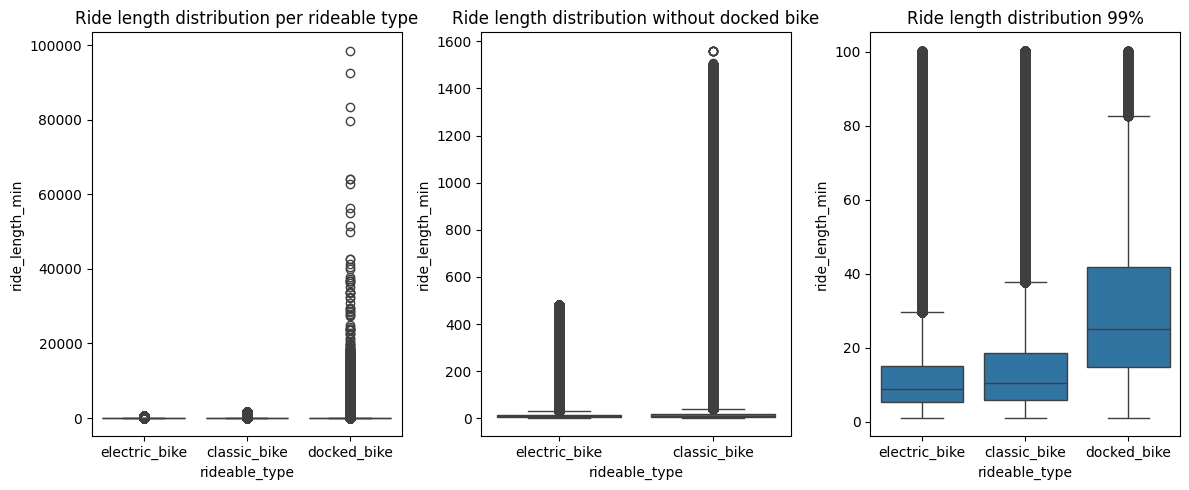

In [36]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12,5),sharex=False)
#ride length distribution for all rideable types
plt.subplot(1,3,1)
ax1 = sns.boxplot(data=df,x='rideable_type',y='ride_length_min')
ax1.set_title('Ride length distribution per rideable type')

# Filtering out the docked_bike value
no_docked_bike = df.query('rideable_type != "docked_bike"')

plt.subplot(1,3,2)
ax2 = sns.boxplot(data = no_docked_bike, x='rideable_type', y='ride_length_min')
ax2.set_title('Ride length distribution without docked bike')

# Filtering our the 1% of values
percent_99 = np.percentile(df['ride_length_min'],99)
df_99 = df.loc[(df['ride_length_min'] <= percent_99)]

plt.subplot(1,3,3)
ax3 = sns.boxplot(data=df_99,x='rideable_type',y='ride_length_min')
ax3.set_title('Ride length distribution 99%')

plt.tight_layout()
plt.show()

**Observations:**
1.   The docked_bike has extremely high ride lengths (outliers), some exceeding 20,000 minutes, skewing the data.
*   Docked bikes may represent rides where users forgot to end their trip properly or other anomalies, leading to long ride durations.
2.  Ride lengths for electric_bike and classic_bike are more consistent.
3.  The majority of ride lengths for electric_bike are shorter than those for classic_bike.
4.   Docked bikes still have higher ride lengths than the other types, even after removing outliers.(filters out the top 1% of ride lengths (extreme outliers) )

**Insights**
1.   Electric Bikes Are Used for Shorter Rides,
*   Electric bikes may be preferred for quick trips or short-distance commutes.
*   Deploy more electric bikes in peak commuting zones

2.   Classic Bikes Have Moderate Ride Lengths
*   Electric bikes may be preferred for recreational or leisure purposes rather than quick commutes.
*   Optimize bike availability in high-demand recreational zones.


***imp***:  Docked bikes have longer ride durations due to user errors or docking station issues. Regular maintenance, user education, and policies like automatic trip termination can reduce these problems. Fixing this will improve system efficiency and user experience.


# ===============================
# 6. DATA VISUALIZATION
# ===============================

## ***1. Key Metric Calculation***

In [37]:

# Total rides
total_rides = len(df)

# Total unique stations
total_stations = len(pd.concat([df['start_station_name'], df['end_station_name']]).unique())

# Average ride length in minutes
average_ride_length_min = df['ride_length_min'].mean()

# Determine the most popular day
most_popular_day = df['day_of_week'].value_counts().idxmax()

# Determine the most popular month (now in month name format)
most_popular_month = df['month'].value_counts().idxmax()

# Determine the most popular season
most_popular_season = df['season'].value_counts().idxmax()

# Determine the most popular time of day
most_popular_time_of_day = df['time_of_day'].value_counts().idxmax()

# Determine the most used starting location
most_used_start_location = df['start_station_name'].value_counts().idxmax()

# Determine the most used ending location
most_used_end_location = df['end_station_name'].value_counts().idxmax()

# Display key metrics
print("Total Rides:", total_rides)
print("Total Unique Stations:", total_stations)
print("Average Ride Length (Minutes):", round(average_ride_length_min, 2))
print("Most Popular Day of the Week:", most_popular_day)
print("Most Popular Month:", most_popular_month)
print("Most Popular Season:", most_popular_season)
print("Most Popular Time of Day:", most_popular_time_of_day)
print("Most Used Starting Location:", most_used_start_location)
print("Most Used Ending Location:", most_used_end_location)


Total Rides: 5570262
Total Unique Stations: 1618
Average Ride Length (Minutes): 18.66
Most Popular Day of the Week: Saturday
Most Popular Month: August
Most Popular Season: Summer
Most Popular Time of Day: Afternoon
Most Used Starting Location: Streeter Dr & Grand Ave
Most Used Ending Location: Streeter Dr & Grand Ave


In [38]:
# Assign colors to variables
blue = '#84c1ff'
red = '#ff6f69'
yellow = '#ffcc5c'
green = '#88d8b0'
light_blue = '#0057e7'
gray = '#8c9da9'

### ***1. Number Of Users per User Type***

In [39]:


# Extract user type counts
user_counts = df['member_casual'].value_counts()

# Create a Plotly Pie chart
fig = go.Figure(
    data=[
        go.Pie(
            labels=user_counts.index,      # Labels for unique user types
            values=user_counts.values,    # Values for count of each user type
            #hole=0.4,                     # Donut-style pie chart
            marker=dict(colors=['red', 'green']),  # Colors for casual and member users
            textinfo='percent+label',     # Display percentage and labels
            texttemplate='%{label}: %{percent:.1%}',  # Show label and percentage
            insidetextorientation='radial'  # Adjust text orientation
        )
    ]
)

# Update layout
fig.update_layout(
    title_text="Number of Users per User Type",  # Chart title
    title_font_size=16,
    height=600,  # Height of the chart
    width=600,   # Width of the chart
    legend_title_text="User Type",  # Legend title
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    )
)

# Display the chart
fig.show()


The chart shows that most users are members (64%), while casual riders make up 36%.

In [40]:


# Extract bike usage data
bike_usage = df['rideable_type'].value_counts()  # Count the number of rides per bike type

# Create the pie chart
fig = go.Figure(
    data=[
        go.Pie(
            labels=bike_usage.index,          # Labels (unique bike types)
            values=bike_usage.values,        # Values (count of each bike type)
            hole=0.4,                        # For a donut-style chart
            marker=dict(colors=['red', 'green', blue]),  # Use the defined colors
            texttemplate='%{percent:.1%}',  # Show percentage with 1 decimal point
            insidetextorientation='auto'    # Automatically adjust text inside sectors
        )
    ]
)

# Update layout
fig.update_layout(
    title_text='Bike Usage by Users',  # Chart title
    title_font_size=16,                # Font size for the title
    height=600,                        # Chart height
    width=600,                         # Chart width
    legend_title_text="Bike Types"     # Add legend title
)

# Display the pie chart
fig.show()


This pie chart shows the distribution of rideable types. Electric bikes are the most used, accounting for 50.9%, followed by classic bikes at 47.7%, while docked bikes are rarely used, making up only 1.4%. This suggests a strong preference for electric and classic bikes, with docked bikes being significantly less popular.

## ***Total Rides by User Type***

In [41]:
import plotly.express as px

# Data preparation
user_type_counts = df['member_casual'].value_counts().reset_index()
user_type_counts.columns = ['member_casual', 'count']  # Rename columns

# Custom colors directly
custom_colors = {'casual': 'red', 'member': 'green'}

# Create the bar chart
fig = px.bar(
    user_type_counts,
    x='member_casual',
    y='count',
    title='Total Rides by User Type',
    labels={'member_casual': 'User Type', 'count': 'Number of Rides'},
)

# Assign colors directly
fig.update_traces(marker_color=[custom_colors[user] for user in user_type_counts['member_casual']])

# Show the chart
fig.show()


## ***Number of Rides per User Type and Rideable Type***

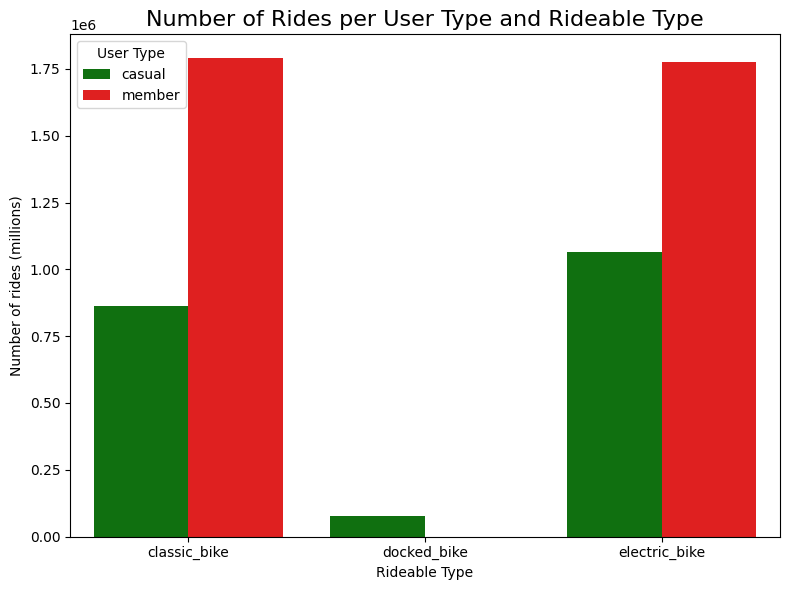

In [42]:
# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=ride_stats,
    x='rideable_type',
    y='ride_count',  # Changed from 'count' to 'ride_count'
    hue='member_casual',
    palette=['green', 'red'],
    hue_order=['casual', 'member']
)

# Add labels, title, and legend
plt.ylabel('Number of rides (millions)')
plt.xlabel('Rideable Type')
plt.title('Number of Rides per User Type and Rideable Type', fontsize=16)
plt.legend(title='User Type')
plt.tight_layout()

# Display the plot
plt.show()

In [43]:


# --- Data Preparation ---
# Ensure categorical ordering for all required columns
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=weekday_order, ordered=True)

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=time_of_day_order, ordered=True)

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
df['season'] = pd.Categorical(df['season'], categories=seasons, ordered=True)

# Grouped data
def grouped_data(column):
    user_counts = df.groupby([column, 'member_casual']).size().reset_index(name='count')
    total_counts = df.groupby(column).size().reset_index(name='total_count')
    return user_counts, total_counts

# Prepare data for each visualization
weekday_counts, total_weekday_counts = grouped_data('day_of_week')
month_counts, total_month_counts = grouped_data('month')
time_counts, total_time_counts = grouped_data('time_of_day')
season_counts, total_season_counts = grouped_data('season')

# --- Visualization ---
# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Rides by Day of the Week", "Rides by Month", "Rides by Time of Day", "Rides by Season"),
    specs=[[{"type": "xy"}, {"type": "xy"}], [{"type": "xy"}, {"type": "xy"}]]
)

# Helper function to add traces
def add_traces(fig, data, total_data, x_col, row, col, show_legend):
    # Add bars for casual users
    casual_data = data[data['member_casual'] == 'casual']
    fig.add_trace(go.Bar(
        x=casual_data[x_col],
        y=casual_data['count'],
        name='Casual Users',
        marker_color='red',
        showlegend=show_legend
    ), row=row, col=col)

    # Add bars for member users
    member_data = data[data['member_casual'] == 'member']
    fig.add_trace(go.Bar(
        x=member_data[x_col],
        y=member_data['count'],
        name='Member Users',
        marker_color='green',
        showlegend=show_legend
    ), row=row, col=col)

    # Add a line for total rides
    fig.add_trace(go.Scatter(
        x=total_data[x_col],
        y=total_data['total_count'],
        name='Total Rides',
        mode='lines+markers',
        line=dict(color='gray'),
        marker=dict(color='blue', size=8),
        showlegend=show_legend
    ), row=row, col=col)

# Add traces for each subplot (legend only for the first subplot)
add_traces(fig, weekday_counts, total_weekday_counts, 'day_of_week', 1, 1, show_legend=True)
add_traces(fig, month_counts, total_month_counts, 'month', 1, 2, show_legend=False)
add_traces(fig, time_counts, total_time_counts, 'time_of_day', 2, 1, show_legend=False)
add_traces(fig, season_counts, total_season_counts, 'season', 2, 2, show_legend=False)

# Update layout
fig.update_layout(
    title='Rides Analysis Dashboard',
    barmode='group',  # Grouped bars
    template='plotly_white',
    height=800,
    width=1200,
    legend_title='User Type'
)

# Show the dashboard
fig.show()


<ipython-input-43-52c875c0c0df>:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-43-52c875c0c0df>:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-43-52c875c0c0df>:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-43-52c875c0c0df>:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

In [44]:
import plotly.express as px

# data for rides by hour
hour_counts = df['hour'].value_counts().sort_index().reset_index()
hour_counts.columns = ['hour', 'count']

# Create bar chart
fig = px.bar(
    hour_counts,
    x='hour',
    y='count',
    title='Rides by Hour',
    labels={
        'hour': 'Hour',
        'count': 'Number of Rides'
    },
    color_discrete_sequence=['green']
)

# Update layout
fig.update_layout(
    title_font_size=16,
    xaxis_title='Hour',
    yaxis_title='Number of Rides',
    height=600,
    width=800
)


fig.show()


## ***Top 5 Start and End Stations***

In [45]:
import plotly.express as px

# Top 5 start stations
top_start_stations = df['start_station_name'].value_counts().head(5).reset_index()
top_start_stations.columns = ['station_name', 'count']

# Plot for Top 5 Start Stations
fig_start = px.bar(
    top_start_stations,
    x='count',
    y='station_name',
    orientation='h',  # Horizontal bar chart
    title='Top 5 Start Stations',
    labels={
        'count': 'Number of Rides',
        'station_name': 'Start Station Name'
    },
    color_discrete_sequence=['green']  # Color for start stations
)
fig_start.update_layout(
    xaxis_title='Number of Rides',
    yaxis_title='Start Station Name',
    height=400,
    width=600
)
fig_start.show()

# Top 5 end stations
top_end_stations = df['end_station_name'].value_counts().head(5).reset_index()
top_end_stations.columns = ['station_name', 'count']

# Plot for Top 5 End Stations
fig_end = px.bar(
    top_end_stations,
    x='count',
    y='station_name',
    orientation='h',  # Horizontal bar chart
    title='Top 5 End Stations',
    labels={
        'count': 'Number of Rides',
        'station_name': 'End Station Name'
    },
    color_discrete_sequence=['red']  # Color for end stations
)
fig_end.update_layout(
    xaxis_title='Number of Rides',
    yaxis_title='End Station Name',
    height=400,
    width=600
)
fig_end.show()


#Geospatial Representation

In [46]:
import plotly.express as px

df_sample = df.sample(n=5000)
df_20 = df.dropna().sample(n=100).sort_values(by=['member_casual','started_at']).reset_index(drop=True)

fig_1= px.scatter_mapbox(df_sample,lat='start_lat',lon='start_lng',color='member_casual',opacity=1,zoom=9,
                         color_discrete_sequence=['red','green'],title='User clustering')

#fig = px.line_geo(df_20,lat='start_lat',lon='start_lng')

fig_1.update_layout(mapbox_style='carto-positron')

fig_1.show()

print()

fig2 = px.scatter_mapbox(df_20, lat="start_lat", lon="start_lng",
                        hover_name=df_20.index,opacity=1,zoom=9,title='User paths')
fig2.update_layout(mapbox_style="carto-positron")
#fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

tsp = list(range(1,100))

fig2.add_traces(px.line_mapbox(df_20.loc[tsp], lat="start_lat", lon="start_lng",color='member_casual',color_discrete_sequence=['green','red']).data)
fig2.show()

## ***Top 10 Start Stations***

In [47]:
# Aggregate data to find the top 10 start stations
top_start_stations = df.groupby(['start_station_name', 'start_lat', 'start_lng']).size().reset_index(name='count')
top_start_stations = top_start_stations.sort_values(by='count', ascending=False).head(10)

# Create scatter mapbox for top 10 start stations
fig_start = px.scatter_mapbox(
    top_start_stations,
    lat='start_lat',
    lon='start_lng',
    size='count',
    color='count',
    hover_name='start_station_name',
    title='Top 10 Start Stations',
    zoom=12,
    mapbox_style='carto-positron',
    color_continuous_scale='Plasma'
)

fig_start.update_traces(marker=dict(size=15))  # Adjust marker size for better visibility
fig_start.show()

In [48]:
# Aggregate data to find the top 10 end stations
top_end_stations = df.groupby(['end_station_name', 'end_lat', 'end_lng']).size().reset_index(name='count')
top_end_stations = top_end_stations.sort_values(by='count', ascending=False).head(10)

# Create scatter mapbox for top 10 end stations
fig_end = px.scatter_mapbox(
    top_end_stations,
    lat='end_lat',
    lon='end_lng',
    size='count',
    color='count',
    hover_name='end_station_name',
    title='Top 10 End Stations',
    zoom=12,
    mapbox_style='carto-positron',
    color_continuous_scale='Plasma'
)

fig_end.update_traces(marker=dict(size=15))  # Adjust marker size for better visibility
fig_end.show()


## **SHARE/ACT**

## **Analysis and Summary**
**1. Number of Users per User Type** :
*   Members make up 64% of the total users, while Casual Users account for 36%.Members dominate the overall usage
*   Design campaigns to convert casual users into members, such as trial memberships or discounts for long-term plans.

**2. Bike Usage by Users** :
*  Electric bikes are the most frequently used, accounting for 50.9% of rides, followed by Classic Bikes (47.7%), and a minimal use of Docked Bikes (1.4%).
*   The high preference for electric bikes reflects user preference for speed and convenience.
*   Expand the fleet of electric bikes to meet demand and evaluate the docked bike program.

**3. Ride Times:**
*  Peak usage occurs between 3 PM and 6 PM(Afternoon and Evening), with moderate
morning rides and low late-night activity.
*  Ensure bike availability during peak hours and promote nighttime usage

**4.Rides by Day of the Week:**
* Highest rides occur on weekdays, especially midweek (Tuesday to Thursday), with member users leading.
* Weekend rides are balanced between casual and member users, suggesting leisure activities.

**5. Rides by Month:**
* Rides peak during summer months (June to August), indicating favorable weather boosts cycling.
* Winter months see a sharp drop in rides

**6. Rides by Season:**
* Summer is the most active season, followed by autumn and spring, while winter sees the least rides.

**7. Top Stations:**
* Central urban areas and tourist spots are the busiest hubs.
* Increase docking capacity and improve services at high-traffic station.









## **Recommendations:**
1. Expand electric bike availability.
2. Offer discounts or trials to convert casual users to members.
3. Improve bike supply during peak hours.
4. Reassess docked bike relevance.
5. Focus on central hubs for better station services and coverage.
6. Focus marketing efforts on casual users during summer weekends.
7. Enhance services for commuting during peak hours (afternoon and evening).
8. Develop winter promotions to encourage year-round usage.
9. Expand bike availability in high-demand months and seasons to accommodate increased activity.